In [1]:
import numpy as np
from scipy.stats import zscore
import scipy.sparse as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyglmnet as pyglmnet

In [3]:
model = pyglmnet.glm('binomial')

In [14]:
# Simulate data

# Dataset size
N = 100000
p = 1000

# Coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(p,1,0.01)
beta = np.array(beta.todense())

# Training data
xr = np.random.normal(0.0, 1.0, [N,p])
yr = model.simulate(beta0, beta, xr)

# Test data
xt = np.random.normal(0.0, 1.0, [N,p])
yt = model.simulate(beta0, beta, xt)


In [17]:
# Set regularization parameters
reg_lambda = np.logspace(np.log(0.5), np.log(0.01), 10, base=np.exp(1))
alpha = 0.8

fit_params = dict()
fit_params['reg_lambda'] = reg_lambda
fit_params['alpha'] = alpha

# Set optimization parameters
opt_params = dict()
opt_params['learning_rate'] = 1e-4
opt_params['max_iter'] = 1000

# Fit model to training data
fit = model.fit(zscore(xr),yr,fit_params,opt_params)


Lambda: 0.5

Lambda: 0.323739401435

Lambda: 0.209614400083

Lambda: 0.13572088083

Converged
    Loss function: 48835.9335527
    dL/L: 0.000966582476831

Lambda: 0.087876393444

Converged
    Loss function: 48525.0546598
    dL/L: 0.000973808637173

Lambda: 0.0568981020276

Converged
    Loss function: 48390.449864
    dL/L: 0.000699647503912

Lambda: 0.0368403149864

Converged
    Loss function: 48303.3127337
    dL/L: 0.000787220011048

Lambda: 0.0238533230447

Converged
    Loss function: 48170.3284255
    dL/L: 0.000865228065333

Lambda: 0.0154445210495

Converged
    Loss function: 47979.6569636
    dL/L: -0.000773276642752

Lambda: 0.01

Converged
    Loss function: 47880.6065996
    dL/L: 0.000659642810102



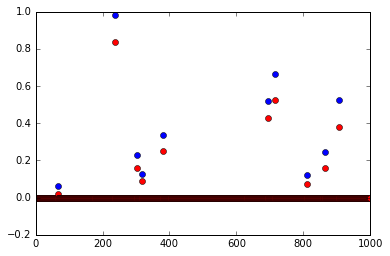

In [10]:
# Visualize estimated coefficients
fitparams = fit[-3]
plt.plot(beta[:], 'bo')
plt.hold(True)
plt.plot(fitparams['beta'][:], 'ro')
plt.show()

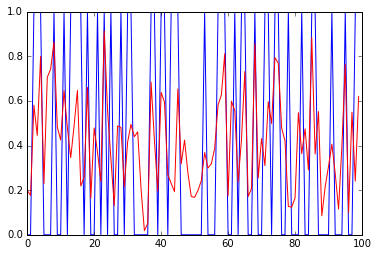

In [11]:
# Predict targets from test set

yrhat = model.lmb(fitparams['beta0'], fitparams['beta'], zscore(xr))
ythat = model.lmb(fitparams['beta0'], fitparams['beta'], zscore(xt))

plt.plot(yt[:100])
plt.hold(True)
plt.plot(ythat[:100], 'r')
plt.show()

In [12]:
# Compute pseudo-R2s
R2r = model.pseudo_R2(yr, yrhat, np.mean(yr))
R2t = model.pseudo_R2(yt, ythat, np.mean(yr))
print R2r, R2t

0.226036773825 0.231956510058
